In [1]:
import sys
import warnings
sys.path.insert(0, "..")
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf

from osvgp.datasets import load_snelson
from osvgp.kernels import SquaredExponential
from osvgp.metrics import compute_lpd, compute_kl_from_exact_posterior
from osvgp.models import GPR, SGPR, OSGPR
from osvgp.optimisers import LBFGS
from osvgp.plotting import plot_dataset_1D, plot_predictions_1D
from osvgp.processing import train_test_split

In [2]:
# Fix random states
tf.random.set_seed(69)
rng = np.random.RandomState(69)

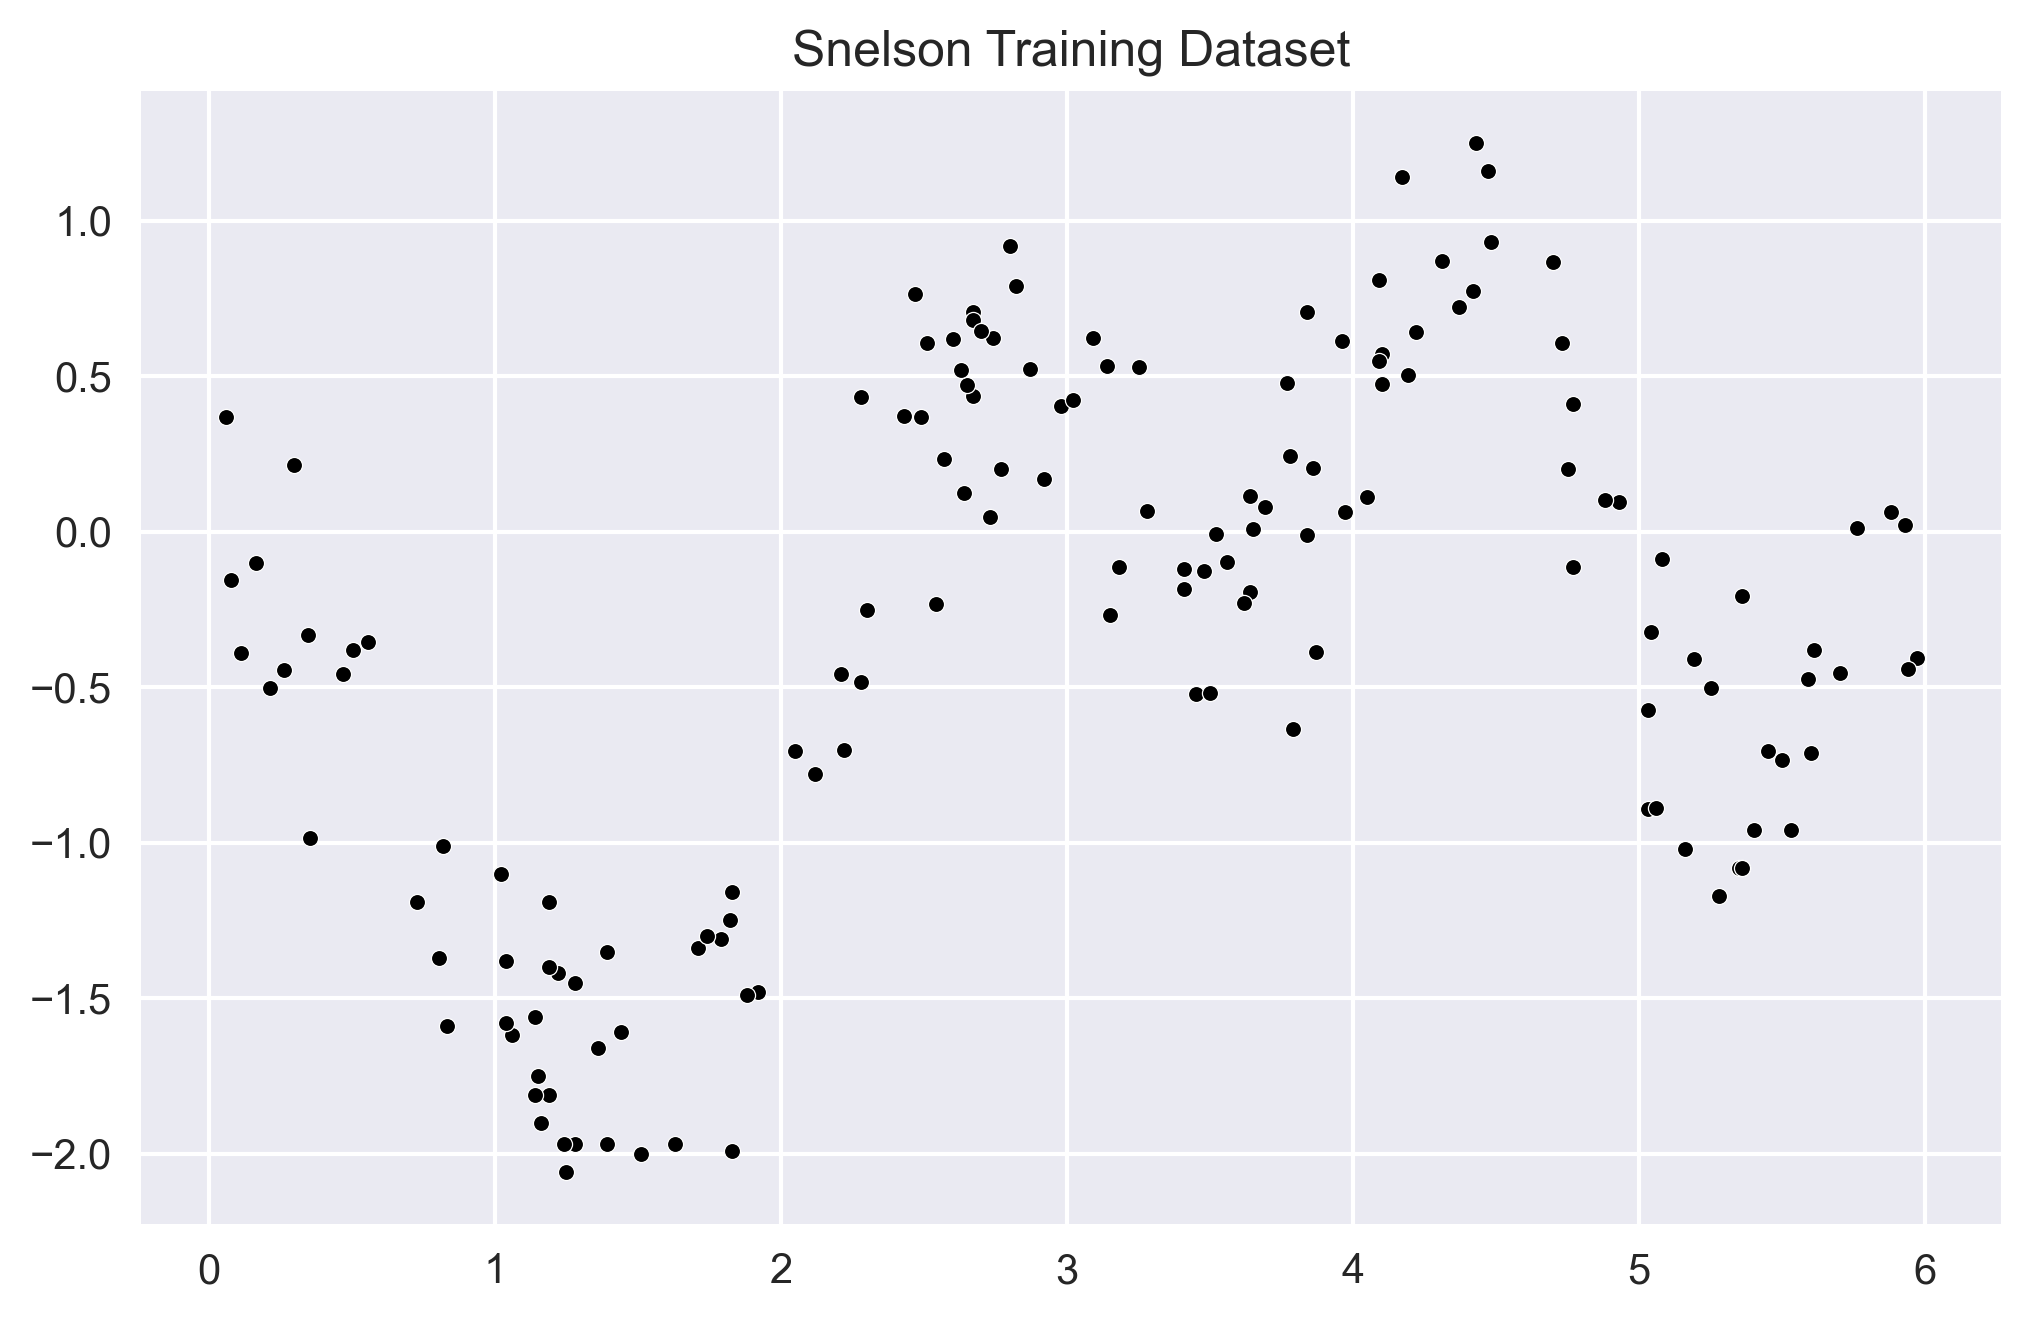

In [3]:
# Load Snelson dataset
data = load_snelson()
train_data, test_data = train_test_split(data, test_size=0.25)
noise_var = 0.25 ** 2

# Generate plot
plot_dataset_1D(train_data, title="Snelson Training Dataset")

<Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=1.0>
(<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>, <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>)
tf.Tensor(-162.67073811101508, shape=(), dtype=float64)


2022-07-30 18:09:48.991265: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-07-30 18:09:49.537353: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


<Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=0.0875033170039747>
(<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.5938617749160695>, <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.717912480329475>)
tf.Tensor(-52.952119117822235, shape=(), dtype=float64)


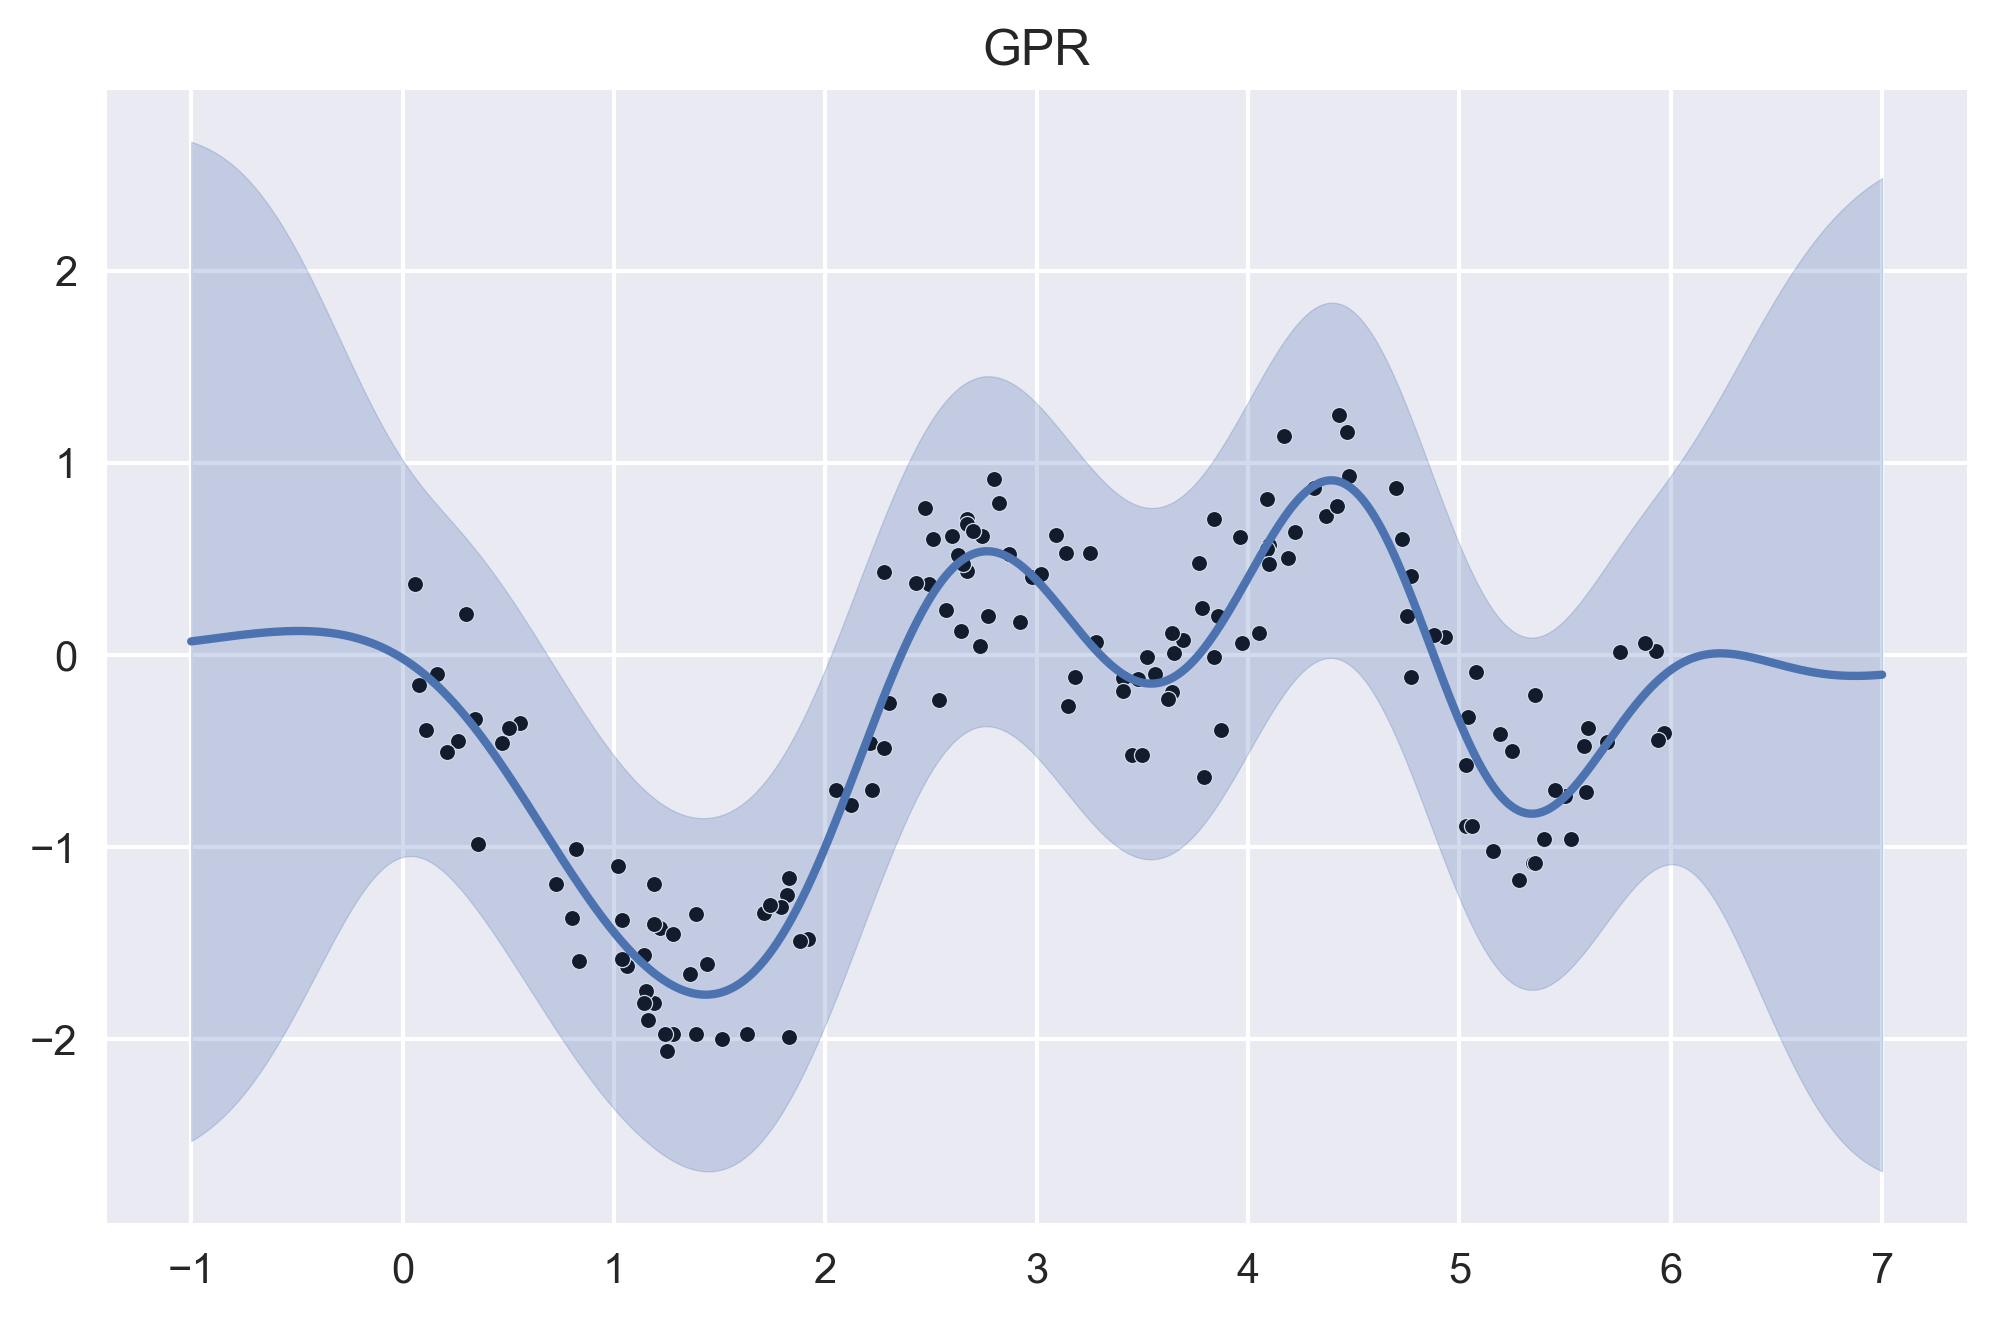

In [4]:
kernel = SquaredExponential()
gpr = GPR(train_data, kernel)
print(gpr.likelihood.variance)
print(gpr.kernel.parameters)
print(gpr.maximum_log_likelihood_objective())
optimiser = LBFGS()
optimiser.minimise(gpr.training_loss, gpr.trainable_variables)
Xnew = np.linspace(-1.0, 7.0, 1000).reshape(-1, 1)
gpr_mean, gpr_var = gpr.predict_y(Xnew)
gpr_preds = (Xnew, gpr_mean, gpr_var)
plot_predictions_1D(train_data, gpr_preds, None, c="C0", title="GPR")
print(gpr.likelihood.variance)
print(gpr.kernel.parameters)
print(gpr.maximum_log_likelihood_objective())

<Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=1.0>
(<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>, <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>)
tf.Tensor(-163.91010219163195, shape=(), dtype=float64)
<Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=0.08749858129551148>
(<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.5939234425867309>, <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.7180423315299055>)
tf.Tensor(-52.95294604287222, shape=(), dtype=float64)


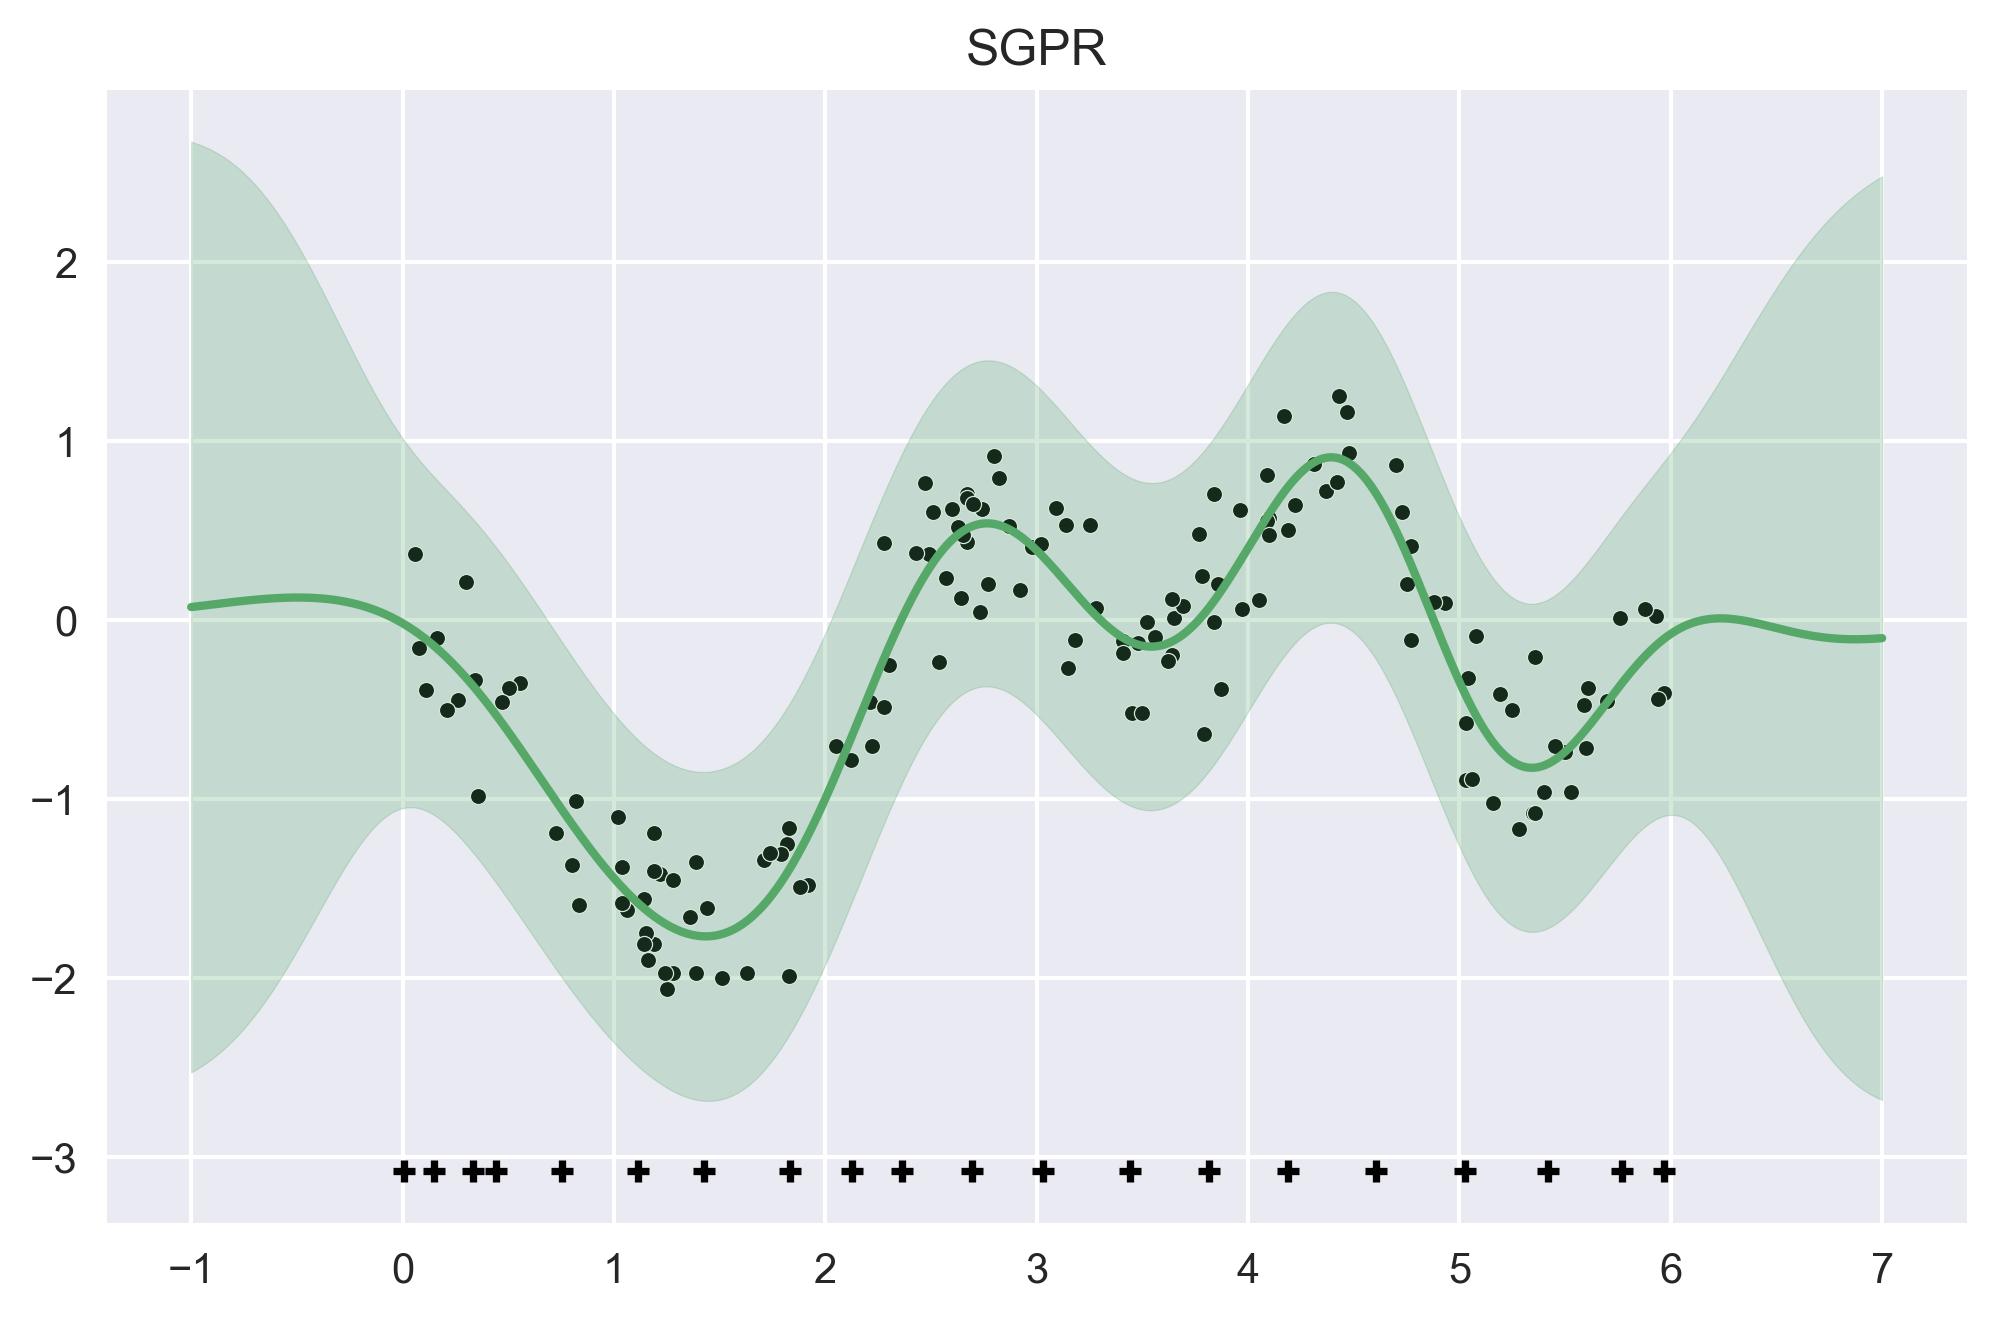

In [13]:
kernel = SquaredExponential()
iv = rng.rand(20, 1) * 6
sgpr = SGPR(train_data, kernel, iv)
print(sgpr.likelihood.variance)
print(sgpr.kernel.parameters)
print(sgpr.maximum_log_likelihood_objective())
optimiser = LBFGS()
optimiser.minimise(sgpr.training_loss, sgpr.trainable_variables)
Xnew = np.linspace(-1.0, 7.0, 1000).reshape(-1, 1)
sgpr_mean, sgpr_var = sgpr.predict_y(Xnew)
sgpr_preds = (Xnew, sgpr_mean, sgpr_var)
sgpr_iv = sgpr.Z
plot_predictions_1D(train_data, sgpr_preds, sgpr_iv, c="C1", title="SGPR")
print(sgpr.likelihood.variance)
print(sgpr.kernel.parameters)
print(sgpr.maximum_log_likelihood_objective())

<Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=1.0>
(<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>, <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>)
tf.Tensor(-162.8454968790842, shape=(), dtype=float64)
<Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=0.08750430887187481>
(<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.593870105504895>, <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.7179141311440624>)
tf.Tensor(-52.952833163968606, shape=(), dtype=float64)


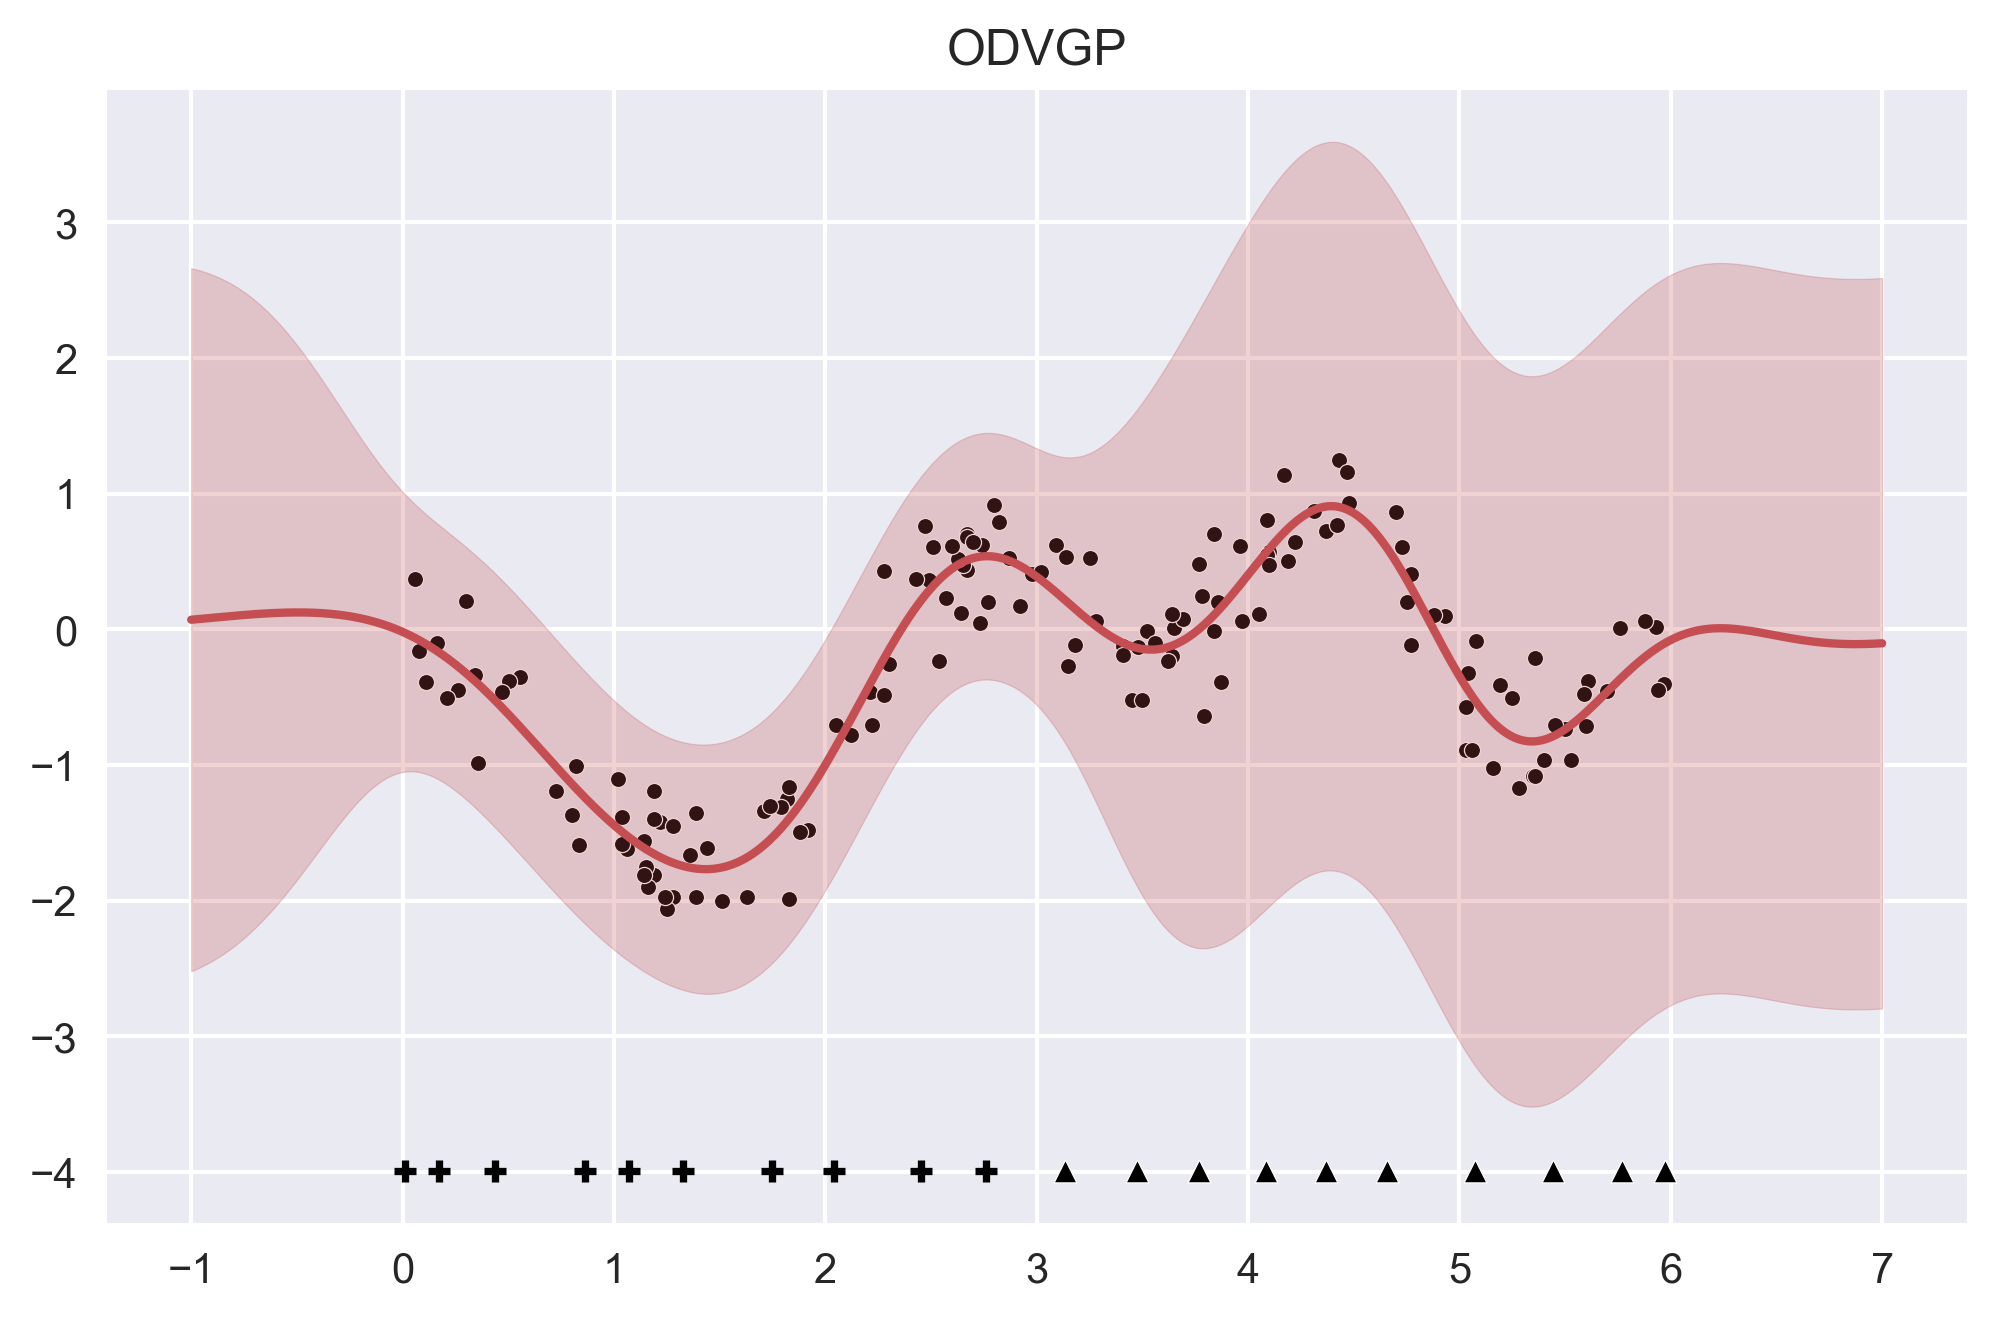

In [6]:
kernel = SquaredExponential()
iv = (rng.rand(10, 1) * 3, rng.rand(10, 1) * 3 + 3)
odvgp = OSGPR(train_data, kernel, iv, method="ODVGP")
print(odvgp.likelihood.variance)
print(odvgp.kernel.parameters)
print(odvgp.maximum_log_likelihood_objective())
optimiser = LBFGS()
optimiser.minimise(odvgp.training_loss, odvgp.trainable_variables)
Xnew = np.linspace(-1.0, 7.0, 1000).reshape(-1, 1)
odvgp_mean, odvgp_var = odvgp.predict_y(Xnew)
odvgp_preds = (Xnew, odvgp_mean, odvgp_var)
odvgp_iv = (odvgp.Z, odvgp.O)
plot_predictions_1D(train_data, odvgp_preds, odvgp_iv, c="C2", title="ODVGP")
print(odvgp.likelihood.variance)
print(odvgp.kernel.parameters)
print(odvgp.maximum_log_likelihood_objective())

<Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=1.0>
(<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>, <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.0>)
tf.Tensor(-162.8529090835808, shape=(), dtype=float64)
<Parameter: name=chain_of_shift_of_softplus, dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=0.08750438912271415>
(<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.59388782088556>, <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=0.7179554656831533>)
tf.Tensor(-52.95287812417444, shape=(), dtype=float64)


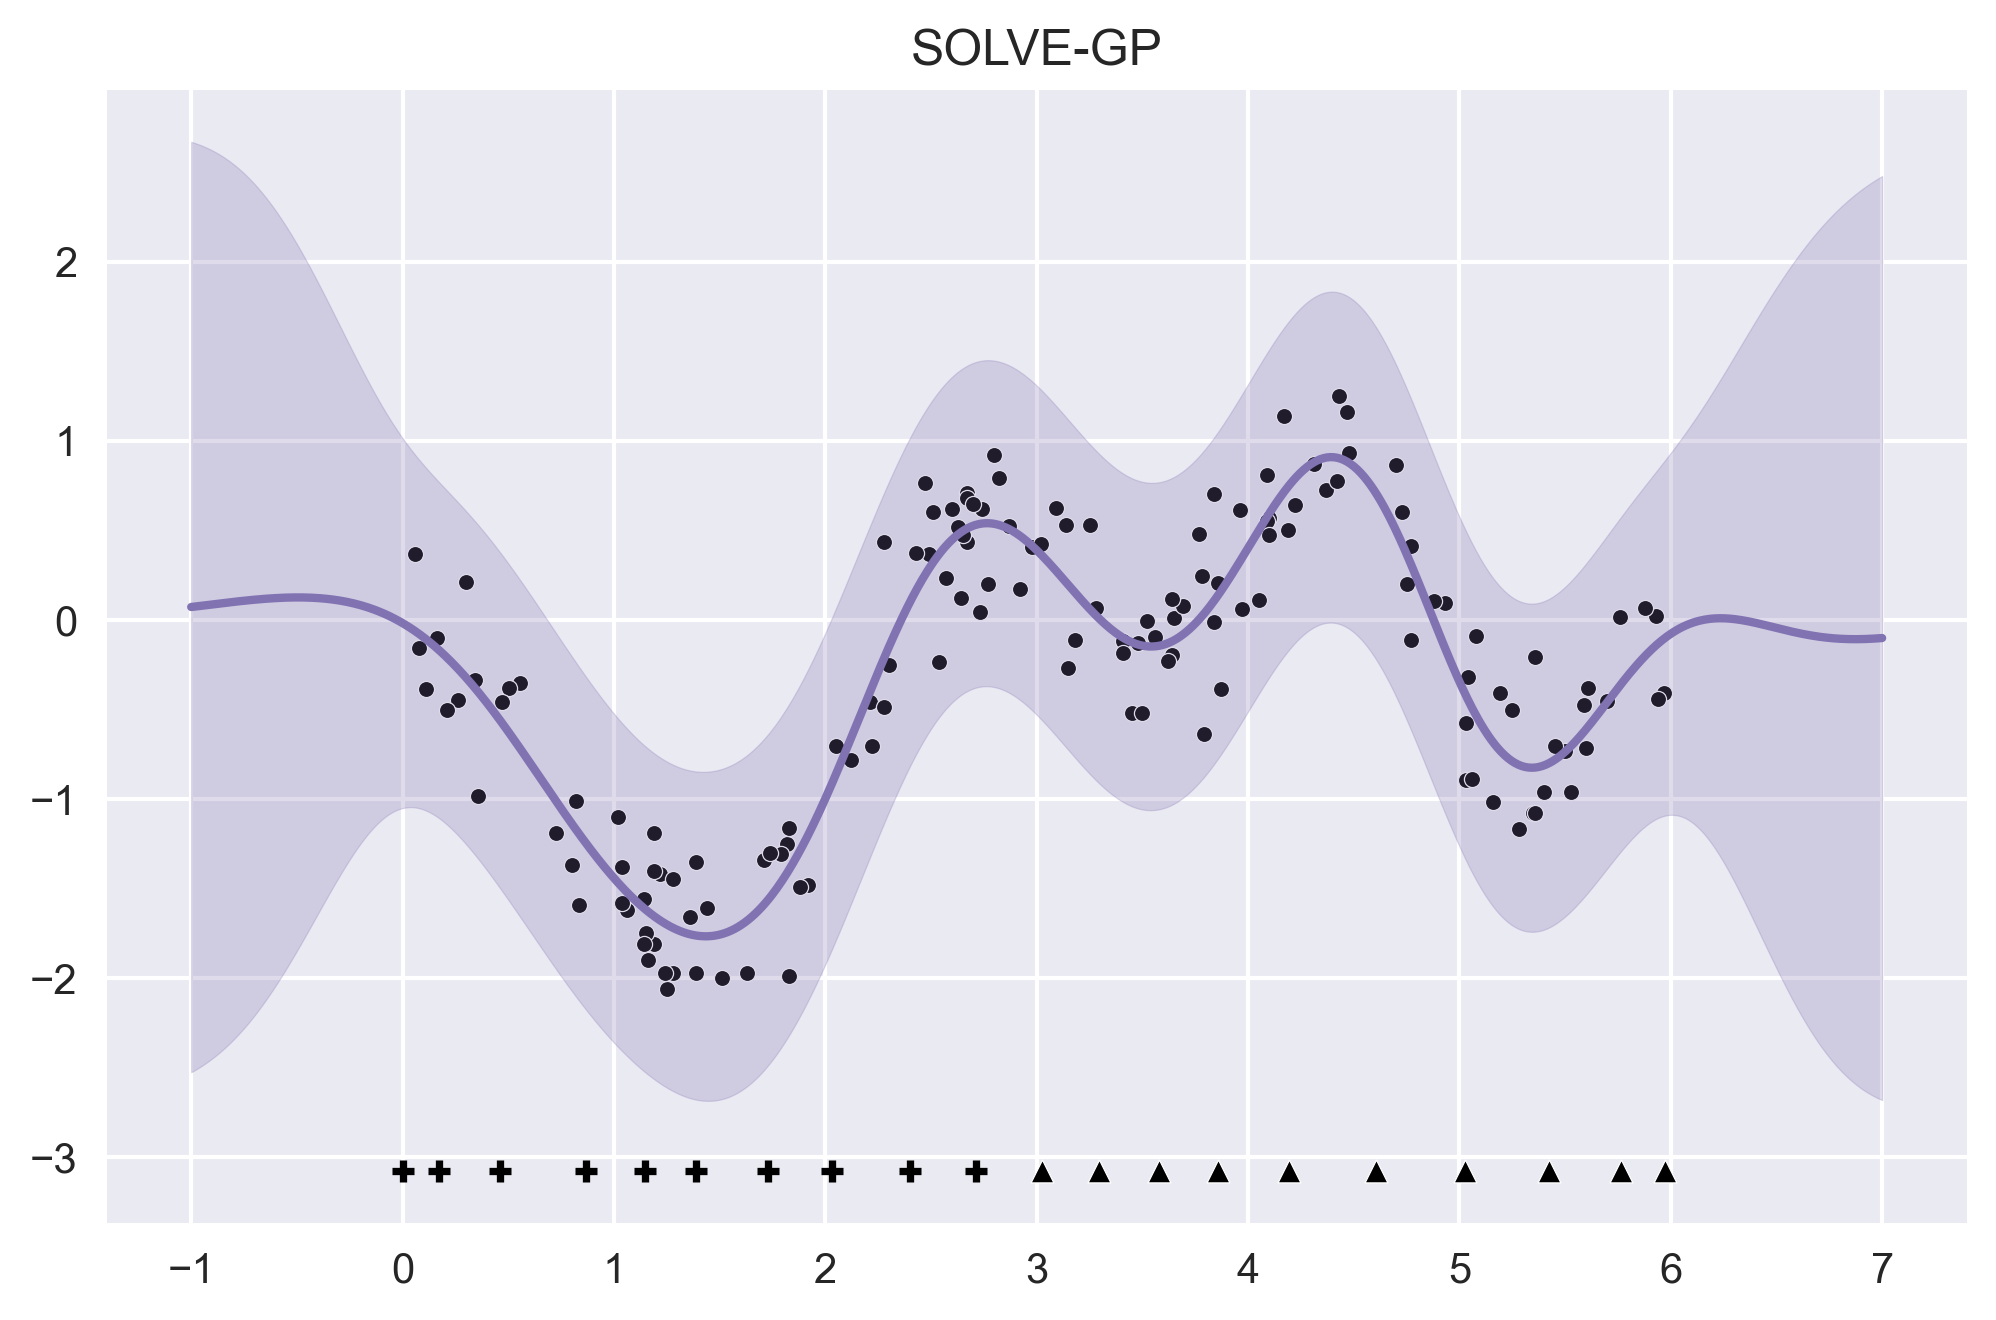

In [7]:
kernel = SquaredExponential()
iv = (rng.rand(10, 1) * 3, rng.rand(10, 1) * 3 + 3)
solvegp = OSGPR(train_data, kernel, iv, method="SOLVE-GP")
print(solvegp.likelihood.variance)
print(solvegp.kernel.parameters)
print(solvegp.maximum_log_likelihood_objective())
optimiser = LBFGS()
optimiser.minimise(solvegp.training_loss, solvegp.trainable_variables)
Xnew = np.linspace(-1.0, 7.0, 1000).reshape(-1, 1)
solvegp_mean, solvegp_var = solvegp.predict_y(Xnew)
solvegp_preds = (Xnew, solvegp_mean, solvegp_var)
solvegp_iv = (solvegp.Z, solvegp.O)
plot_predictions_1D(train_data, solvegp_preds, solvegp_iv, c="C3", title="SOLVE-GP")
print(solvegp.likelihood.variance)
print(solvegp.kernel.parameters)
print(solvegp.maximum_log_likelihood_objective())

In [15]:
print(compute_lpd(gpr, test_data))
print(compute_lpd(sgpr, test_data))
print(compute_lpd(odvgp, test_data))
print(compute_lpd(solvegp, test_data))
print(compute_kl_from_exact_posterior(gpr))
print(compute_kl_from_exact_posterior(sgpr))
print(compute_kl_from_exact_posterior(odvgp))
print(compute_kl_from_exact_posterior(solvegp))

-4.358246699402184
-4.357418313897475
-19.11983882627273
-4.3581291811926555
0.0
0.0013430236508611415
240.34783785540708
0.0010383654375232254


In [ ]:
# Initialise inducing variables
Mu, Mv = 10, 10
Z, O = rng.rand(Mu, 1) * 3, rng.rand(Mv, 1) * 3 + 3
iv_reg, iv_orthog = np.vstack((Z, O)), (Z, O)

# Initialise kernels
kernel_reg = SquaredExponential()
kernel_orthog = SquaredExponential()
            
# Initialise SGPR models
sgpr = SGPR(train_data, kernel_reg, iv_reg, noise_variance=noise_var)
odvgp = OSGPR(train_data, kernel_orthog, iv_orthog, noise_var, "ODVGP")
solvegp = OSGPR(train_data, kernel_orthog, iv_orthog, noise_var, "SOLVE-GP")

In [ ]:
# Optimise SGPR model with L-BFGS
optimiser = LBFGS()
optimiser.minimise(sgpr.training_loss, 
                   sgpr.trainable_variables,
                   options={"maxiter": 1000, "disp": False})

# Optimise ODVGP model with L-BFGS
optimiser = LBFGS()
optimiser.minimise(odvgp.training_loss, 
                   odvgp.trainable_variables,
                   options={"maxiter": 1000, "disp": False})

# Optimise SOLVE-GP model with L-BFGS
optimiser = LBFGS()
optimiser.minimise(solvegp.training_loss, 
                   solvegp.trainable_variables,
                   options={"maxiter": 1000, "disp": False})             

In [ ]:
# New points at which to predict the latent function
Xnew = np.linspace(-1.0, 7.0, 1000).reshape(-1, 1)

# SGPR predictions
sgpr_mean, sgpr_var = sgpr.predict_y(Xnew)
sgpr_preds = (Xnew, sgpr_mean, sgpr_var)
sgpr_iv = sgpr.inducing_variable.Z[:, :]

# ODVGP predictions
odvgp_mean, odvgp_var = odvgp.predict_y(Xnew)
odvgp_preds = (Xnew, odvgp_mean, odvgp_var)
odvgp_iv = (odvgp.Z, odvgp.O)

# SOLVE-GP predictions
solvegp_mean,  solvegp_var = solvegp.predict_y(Xnew)
solvegp_preds = (Xnew, solvegp_mean, solvegp_var)
solvegp_iv = (solvegp.Z, solvegp.O)

# Generate plots
plot_predictions_1D(train_data, sgpr_preds, sgpr_iv, c="C0", title="SGPR")
plot_predictions_1D(train_data, odvgp_preds, odvgp_iv, c="C1", title="ODVGPR")
plot_predictions_1D(train_data, solvegp_preds, odvgp_iv, c="C2", title="SOLVE-GPR")

In [ ]:
# print(tf.reduce_sum(sgpr.predict_log_density(test_data)))
# print(tf.reduce_sum(odvgp.predict_log_density(test_data)))
# print(tf.reduce_sum(solvegp.predict_log_density(test_data)))

In [ ]:
# # Variational parameters
# Z, O = solve_gp.Z, solve_gp.O
# mu, mv = solve_gp.mu, solve_gp.mv
# Su, Sv = solve_gp.Su, solve_gp.Sv

# # Generate plot
# fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# ax.scatter(X, y, facecolor="k", edgecolor="w", s=10, alpha=0.8, 
#            marker="^",label="Observations")
# ax.scatter(Z, mu, facecolor="C0", edgecolor="w", s=30, label="u=f(Z)")
# ax.scatter(O, mv, facecolor="C1", edgecolor="w", s=30, label="v=f(O)")
# ax.set_title("Variational Parameters")
# ax.legend()
# plt.show()